# **Amazon Product Review Analysis** 

### **Overview**

To develop an automated system to analyze and monitor an enormous number of reviews.
Analyze tone, language, keywords and trend to provide valuable insight that increases the succcess rate of marketing campaigns of new and existing products.

## **Business Objective**

After treating the data, doing data procesing and applying various ML algorithms,time-series NLP models to get the insight from the data to help company grow the bussiness.

## **Data Dictionary**

*   **reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
---

*   **asin** - ID of the product, e.g. 0000013714
---
*   **reviewerName** - name of the reviewer
---
*   **helpful** - helpfulness rating of the review, e.g. 2/3
---
*   **reviewText** - text of the review
---
*   **overall** - rating of the product
---
*   **summary** - summary of the review
---
*   **unixReviewTime** - time of the review (unix time)
---
*   **reviewTime** - time of the review (raw)
---
*   **overall**  -  Customers Rating	
---
*   **verified** - If customers is verified or not	
---
*   **reviewTime** - Time of Reveiw 
---
*   **title** - name of the product
---
*   **price** - price in US dollars (at time of crawl)
---
*   **imUrl** - url of the product image
---
*   **related** - related products (also bought, also viewed, bought together,buy after viewing)
---
*   **rank** - product sales rank in main category
---
*   **brand** - brand name
---
*   **categories** - list of categories the product belongs to

# **Importing Basic Libraries**

In [ ]:
! pip install mysql.connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 49.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp38-cp38-linux_x86_64.whl size=247965 sha256=0de74946d6ab25a18a8673b4878bacbfee34d6d2a51f27271cfb9ced6e9e0ad1
  Stored in directory: /root/.cache/pip/wheels/57/e4/98/5feafb5c393dd2540e44b064a6f95832990d543e5b4f53ea8f
Successfully built mysql.connector


In [ ]:
! pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.2 MB/s eta 0:00:00


In [ ]:
import re                                  # for text preprocessing
import pandas as pd                        # for data manipulation and analysis
import json                                # to load  jason file
import  numpy as np                        # to deal with mul
import matplotlib.pyplot as plt            # for visualization
import seaborn as sns                      # for visualization
from tabulate import tabulate              # to create tabels 
from ipywidgets import interact            # to make intractive functions 
pd.set_option('display.max_columns',30)    # to limit the number of rows displayed
from datetime import datetime              # for preprocessing the data for time-series analysis
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive # to access the drive files 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


## **Importing Data File**

In [ ]:
df=pd.read_json('Industrial_and_Scientific_5.json.gz',lines=True) #reading data jason file 
df1=pd.read_json('meta_Industrial_and_Scientific.json.gz',lines=True) # readind meta data

In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


In [ ]:
df1.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Industrial & Scientific, Industrial Electrica...",,[RCRF-03 - Works on all Turning Technologies R...,,Turning Technologies Response Card (RCRF-03),"[1454894547, 0133455548, 0538741252, 193493139...",,"Turning Technologies, LLC",[],"12,329 in Industrial & Scientific (",[],Industrial & Scientific,,,$23.61,0176496920,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,[],,[The only laminated pocket tool that provides ...,,R-Cat 692782109 EKG Badge with Arrhythmia Pock...,"[B01NBCNTJ9, B01IAHKULS, B01MT59BRR, 194100406...",,R-Cat,[],"20,174 in Industrial & Scientific (",[],Industrial & Scientific,,,$20.00,0692782109,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Industrial & Scientific, Science Education]","class=""a-keyvalue prodDetTable"" role=""present...","[<div>, Now in its Second Edition,<B>The Spina...",,Anatomical Chart Company's Illustrated Pocket ...,"[0781776821, 078177683X, 0781776783, 157222684...",,Anatomical Chart Company,"[MPN: 9780781776844, Authentic Anatomical Char...","[>#351,522 in Office Products (See top 100), >...",[],Office Products,,"August 7, 2007",$10.37,0781776848,[],[],NaN
3,"[Industrial & Scientific, Science Education, C...","class=""a-keyvalue prodDetTable"" role=""present...","[<div>, Developed in conjunction with a health...",,Joints of the Lower Extremities Anatomical Chart,"[0781786630, 1587798085, B004MAJHLW, 078178656...",,Anatomical Chart Company,"[MPN: 9780781786607, Authentic Anatomical Char...","[>#459,493 in Office Products (See top 100), >...","[B07BCNHC3K, B07D6X5TCB, 1587799839]",Office Products,,"February 26, 2009",,0781786606,[],[],NaN
4,"[Industrial & Scientific, Industrial Electrica...",,[Advanced digital clicker used in college clas...,,Turning Technologies ResponseCard XR RCXR-01,"[0077402286, 1455706124]",,Responsive Innovations,[],"172,566 in Industrial & Scientific (",[],Industrial & Scientific,,,$32.00,0840026080,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [ ]:
df.columns  # reviews data columns 

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [ ]:
df1.columns #Columns in meta data

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

 **Since the meta data contains the information of all the products that were reviewed we'll merge the dataframes on Product ID(asin)**


In [ ]:
test_df = pd.merge(df,df1,on='asin')

In [ ]:
data_df=pd.merge(df,df1,on='asin')
#data_df.head()


In [ ]:
def cat_vis(main_category, brands):                         #To be able to look at the data that is specific to a main category and/or brand
  display(data_df[(data_df['main_cat']==main_category) & (data_df['brand']==brands)].head())
interact(cat_vis,main_category=data_df.main_cat.unique(), brands=data_df.brand.unique()) ;

interactive(children=(Dropdown(description='main_category', options=('Tools & Home Improvement', 'Industrial &…

 **Data types of different columns**

In [ ]:
data_df.info() # data information 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81520 entries, 0 to 81519
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          81520 non-null  int64 
 1   verified         81520 non-null  bool  
 2   reviewTime       81520 non-null  object
 3   reviewerID       81520 non-null  object
 4   asin             81520 non-null  object
 5   style            38339 non-null  object
 6   reviewerName     81490 non-null  object
 7   reviewText       81508 non-null  object
 8   summary          81509 non-null  object
 9   unixReviewTime   81520 non-null  int64 
 10  vote             10127 non-null  object
 11  image            1749 non-null   object
 12  category         81520 non-null  object
 13  tech1            81520 non-null  object
 14  description      81520 non-null  object
 15  fit              81520 non-null  object
 16  title            81520 non-null  object
 17  also_buy         81520 non-null

In [ ]:
data_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes',
       'details'],
      dtype='object')

In [ ]:
data_df.shape

(81520, 30)

In [ ]:
data_df.describe()

,overall,unixReviewTime
count,81520.000000,8.152000e+04
mean,4.526816,1.454085e+09
std,0.946186,4.627941e+07
min,1.000000,1.051402e+09
25%,4.000000,1.426982e+09
50%,5.000000,1.458778e+09
75%,5.000000,1.486512e+09
max,5.000000,1.538093e+09


# **Data Preprocessing**

In [ ]:
#Repalcing blank rows with NP.NAN in the entire dataframe
data_df.price.replace(r'\$', '', regex=True, inplace = True)
data_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

### **Null Values Treatment**

In [ ]:
data_df.isnull().sum() # checking the null values in the entire dataframe

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style              43181
reviewerName          30
reviewText            12
summary               11
unixReviewTime         0
vote               71393
image              79771
category               0
tech1              49402
description            0
fit                81446
title                  0
also_buy               0
tech2              81448
brand                265
feature                0
rank                   0
also_view              0
main_cat              98
similar_item       75864
date               45087
price              11610
imageURL               0
imageURLHighRes        0
details                0
dtype: int64

In [ ]:
def len_null(data_df,i): # this function will give us the number of rows which has null value in it or empty list or empty dictionary
  int_nan = 0   #to store continuous nan value
  list2 = []  # to store lenght of null values in text data columns or columns which contain of cetrain datatype i.e dict, list, tuple 
  for s in data_df[i]:
    if type(s) == float or type(s)== bool or type(s) == int:
      if s is np.nan:
        int_nan+=1
    elif len(s)==0:
      list2.append(s)
  if type(s) == float or type(s)== bool or type(s) == int:
    return int_nan
  else:
    return len(list2)

In [ ]:
unwanted_cols = []   #these are the columns which has more than 25% null values
final_cols = []
for i in data_df.columns:
  if round((len_null(data_df,i)/(len(data_df)))*100)<25:
    final_cols.append(i)
  else:
    unwanted_cols.append(i)

In [ ]:
unwanted_cols.append('similar_item')  

In [ ]:
def nulll(data_df,i):
  l=[]
  r=[]
  a=type(data_df.loc[data_df[i]!=np.NaN,i][0])
  # print(i, type(i))
  if a==list or a==dict:
    for s in data_df[i]:
      if len(s)==0 : 
        l.append(s) 
        r=len(l)
  elif a==float or a==int:
    r=data_df[i].isnull().sum()
  return r  
def details (data_df,i):
    data_df[i]=data_df[i].apply(lambda x: ' ,'.join(str(x) for x in x) if type(x)==list else  x)
    print('The Number of unique values in column - {0} is {1}\n'.format(str(i),(data_df[i].nunique())))
    print('The Null values in this column{0} is {1} '.format(str(i),len_null(data_df,i)))
    print('\nThe number of duplicates are ',(data_df.duplicated(subset=[i for i in data_df.drop(columns='style').columns[:9]],keep=False).sum()))

In [ ]:
def mostcommon(data_df,i,j):
  from collections import Counter
  counts= Counter()
  for i in data_df[i]:
    counts[i]+=1
  a=counts.most_common(j)
  return pd.DataFrame(a,columns=['Name','Count']) 

In [ ]:
def string(data_df,i):
  print(data_df[i])
  details(data_df,i)
  display(mostcommon(data_df,i,5))
  l=[]
  for i in data_df[i]:
    if i!=np.NaN:
      l.append(i)
  print('\nNon Empty String Values are : ',len(l) ) 
  #print('\n',l[0])

In [ ]:
print(unwanted_cols)

['style', 'vote', 'image', 'tech1', 'fit', 'also_buy', 'tech2', 'feature', 'also_view', 'date', 'imageURL', 'imageURLHighRes', 'details', 'similar_item']


## **Details of these Columns**

Vote 

In [ ]:
string(data_df,'vote')
data_df['vote'].value_counts()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
81515    NaN
81516      2
81517    NaN
81518    NaN
81519    NaN
Name: vote, Length: 81520, dtype: object
The Number of unique values in column - vote is 184

The Null values in this columnvote is 71393 

The number of duplicates are  16901


,Name,Count
0,NaN,71393
1,2,3460
2,3,1829
3,4,1072
4,5,718



Non Empty String Values are :  81520


2      3460
3      1829
4      1072
5       718
6       478
       ... 
53        1
246       1
116       1
79        1
905       1
Name: vote, Length: 184, dtype: int64

### Image

In [ ]:
string(data_df,'image')

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
81515    [https://images-na.ssl-images-amazon.com/image...
81516    [https://images-na.ssl-images-amazon.com/image...
81517                                                  NaN
81518                                                  NaN
81519                                                  NaN
Name: image, Length: 81520, dtype: object
The Number of unique values in column - image is 1595

The Null values in this columnimage is 79771 

The number of duplicates are  16901


,Name,Count
0,NaN,79771
1,https://images-na.ssl-images-amazon.com/images...,7
2,https://images-na.ssl-images-amazon.com/images...,6
3,https://images-na.ssl-images-amazon.com/images...,4
4,https://images-na.ssl-images-amazon.com/images...,4



Non Empty String Values are :  81520


### Fit

In [ ]:
string(data_df,'fit')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
81515    NaN
81516    NaN
81517    NaN
81518    NaN
81519    NaN
Name: fit, Length: 81520, dtype: object
The Number of unique values in column - fit is 3

The Null values in this columnfit is 81446 

The number of duplicates are  16901


,Name,Count
0,NaN,81446
1,"class=""a-normal a-align-center a-spacing-smal...",37
2,"class=""a-normal a-align-center a-spacing-smal...",33
3,"class=""a-normal a-align-center a-spacing-smal...",4



Non Empty String Values are :  81520


### Tech1

In [ ]:
string(data_df,'tech1')

0         class="a-keyvalue prodDetTable" role="present...
1         class="a-keyvalue prodDetTable" role="present...
2         class="a-keyvalue prodDetTable" role="present...
3         class="a-keyvalue prodDetTable" role="present...
4         class="a-keyvalue prodDetTable" role="present...
                               ...                        
81515                                                  NaN
81516                                                  NaN
81517                                                  NaN
81518                                                  NaN
81519                                                  NaN
Name: tech1, Length: 81520, dtype: object
The Number of unique values in column - tech1 is 1872

The Null values in this columntech1 is 49402 

The number of duplicates are  16901


,Name,Count
0,NaN,49402
1,"class=""a-keyvalue prodDetTable"" role=""present...",2139
2,"class=""a-keyvalue prodDetTable"" role=""present...",305
3,"class=""a-keyvalue prodDetTable"" role=""present...",210
4,"class=""a-keyvalue prodDetTable"" role=""present...",202



Non Empty String Values are :  81520


### Tech2

In [ ]:
string(data_df,'tech2')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
81515    NaN
81516    NaN
81517    NaN
81518    NaN
81519    NaN
Name: tech2, Length: 81520, dtype: object
The Number of unique values in column - tech2 is 3

The Null values in this columntech2 is 81448 

The number of duplicates are  16901


,Name,Count
0,NaN,81448
1,"class=""a-keyvalue prodDetTable"" role=""present...",51
2,"class=""a-keyvalue prodDetTable"" role=""present...",12
3,"class=""a-keyvalue prodDetTable"" role=""present...",9



Non Empty String Values are :  81520


### Feature 

In [ ]:
string(data_df,'feature')

0        [Clog- and loading-resistant sandpaper can be ...
1        [Clog- and loading-resistant sandpaper can be ...
2        [Clog- and loading-resistant sandpaper can be ...
3        [Clog- and loading-resistant sandpaper can be ...
4        [Clog- and loading-resistant sandpaper can be ...
                               ...                        
81515    [<span class="a-text-bold">Level bed</span>- H...
81516    [<span class="a-text-bold">Level bed</span>- H...
81517    [<span class="a-text-bold">Level bed</span>- H...
81518    [<span class="a-text-bold">Level bed</span>- H...
81519    [<span class="a-text-bold">Level bed</span>- H...
Name: feature, Length: 81520, dtype: object
The Number of unique values in column - feature is 3156

The Null values in this columnfeature is 23312 

The number of duplicates are  16901


,Name,Count
0,,23312
1,Indoor thermometer displays temperature in Fah...,2139
2,Venting channels allow air to flow into the ga...,1300
3,"1 KG (approximately 2.20 lbs) Spool ,1.75mm Fi...",715
4,"<span class=""a-size-base a-color-secondary"">\n...",410



Non Empty String Values are :  81520


### Also Buy 

In [ ]:
string(data_df,'also_buy')

0        [B0000223SK, B0000223SN, B0000223SJ, B0000223S...
1        [B0000223SK, B0000223SN, B0000223SJ, B0000223S...
2        [B0000223SK, B0000223SN, B0000223SJ, B0000223S...
3        [B0000223SK, B0000223SN, B0000223SJ, B0000223S...
4        [B0000223SK, B0000223SN, B0000223SJ, B0000223S...
                               ...                        
81515    [B01H3JH2TC, B01H4KWVLE, B01H3JGSUQ, B01LYOHEI...
81516    [B01H3JH2TC, B01H4KWVLE, B01H3JGSUQ, B01LYOHEI...
81517    [B01H3JH2TC, B01H4KWVLE, B01H3JGSUQ, B01LYOHEI...
81518    [B01H3JH2TC, B01H4KWVLE, B01H3JGSUQ, B01LYOHEI...
81519    [B01H3JH2TC, B01H4KWVLE, B01H3JGSUQ, B01LYOHEI...
Name: also_buy, Length: 81520, dtype: object
The Number of unique values in column - also_buy is 4025

The Null values in this columnalso_buy is 21917 

The number of duplicates are  16901


,Name,Count
0,,21917
1,"B0721TZFDR ,B0759FKH8K ,B01EF9OI0O ,B077Y5JBQ5...",410
2,"B00W395R5E ,B00563TM32 ,B07DNNX9Y3 ,B00092CJC6...",305
3,"B00B4ZRPEY ,B01N6TKDDH ,B001769IRW ,B000EIO86A...",241
4,"B000BRQ0TW ,B00VWQZ9DE ,B00HWROO7E ,B001449M4Q...",210



Non Empty String Values are :  81520


### Also View 

In [ ]:
string(data_df,'also_view')

0        []
1        []
2        []
3        []
4        []
         ..
81515    []
81516    []
81517    []
81518    []
81519    []
Name: also_view, Length: 81520, dtype: object
The Number of unique values in column - also_view is 1042

The Null values in this columnalso_view is 66190 

The number of duplicates are  16901


,Name,Count
0,,66190
1,"B00HWROO7E ,B000BRQ0TW ,B002LA2258 ,B01LZQYCTY...",210
2,"B0000DD5EN ,B0000223UV ,B0000223UU ,B01MCZCPGU...",202
3,"B00F462ZJY ,B008UB6IKC ,B00C1K7Y74 ,B00C7GLTIC...",172
4,"B0006O1ICY ,B014OVHAOY ,B00RN7CT2U ,B0762LB5VP...",165



Non Empty String Values are :  81520


### Similar Items 

In [ ]:
string(data_df,'similar_item')

0         class="a-bordered a-horizontal-stripes  a-spa...
1         class="a-bordered a-horizontal-stripes  a-spa...
2         class="a-bordered a-horizontal-stripes  a-spa...
3         class="a-bordered a-horizontal-stripes  a-spa...
4         class="a-bordered a-horizontal-stripes  a-spa...
                               ...                        
81515     class="a-bordered a-horizontal-stripes  a-spa...
81516     class="a-bordered a-horizontal-stripes  a-spa...
81517     class="a-bordered a-horizontal-stripes  a-spa...
81518     class="a-bordered a-horizontal-stripes  a-spa...
81519     class="a-bordered a-horizontal-stripes  a-spa...
Name: similar_item, Length: 81520, dtype: object
The Number of unique values in column - similar_item is 408

The Null values in this columnsimilar_item is 0 

The number of duplicates are  16901


,Name,Count
0,NaN,75864
1,"class=""a-bordered a-horizontal-stripes a-spa...",144
2,"class=""a-bordered a-horizontal-stripes a-spa...",123
3,"class=""a-bordered a-horizontal-stripes a-spa...",99
4,"class=""a-bordered a-horizontal-stripes a-spa...",92



Non Empty String Values are :  81520


#### Drop

In [ ]:
# #droping columns which has more than 25% null values 
data_df.drop(unwanted_cols, axis=1, inplace = True)

### **Dropping Duplicate rows and columns**

**After removing all the columns which have more than 25% null values as they cannot be imputed for the reason that if we do so it will create skewnees in data and most of these columns are not useful**

**Data after removing all the columns**

In [ ]:
data_df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,"[Industrial & Scientific, Abrasive & Finishing...","[Amazon.com This superior quality, clog- and l...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,"[>#19,857 in Tools & Home Improvement (See top...",Tools & Home Improvement,15.99
1,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,"[Industrial & Scientific, Abrasive & Finishing...","[Amazon.com This superior quality, clog- and l...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,"[>#19,857 in Tools & Home Improvement (See top...",Tools & Home Improvement,15.99
2,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,"[Industrial & Scientific, Abrasive & Finishing...","[Amazon.com This superior quality, clog- and l...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,"[>#19,857 in Tools & Home Improvement (See top...",Tools & Home Improvement,15.99


**Now we'll drop all the duplicate rows**

In [ ]:
data_df['reviewerID'].drop_duplicates( keep='first', inplace = True)

**Now we'll drop duplcation columns as we can see reviewTime is twice in the dataframe**


In [ ]:
data_df.drop('reviewTime', inplace = True, axis=1)

# **Data Preprocessing**

 **Null Values Treatment**

In [ ]:
data_df.tail()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price
81515,5,True,A2U1SYP4XCIUIK,B01H3JGYYG,iskum kloshe,This is a very nice shade of Blue. I really l...,"Execellent Quality Filament, lovely Shade of B...",1538092800,"[Industrial & Scientific, Additive Manufacturi...",[],3D PLA 1.75MM BLUE Plastic 3D Printer Printing...,LabelPros,"245,255 in Industrial & Scientific (",Industrial & Scientific,18.96
81516,3,True,A10JIO20CJTVIH,B01H3JGYYG,Rycrok8,Great printing filament as long as you have su...,"Great printing, inconsistent color.",1510272000,"[Industrial & Scientific, Additive Manufacturi...",[],3D PLA 1.75MM BLUE Plastic 3D Printer Printing...,LabelPros,"245,255 in Industrial & Scientific (",Industrial & Scientific,18.96
81517,5,True,A14S92BQ0OPW15,B01H3JGYYG,Dorian,I find this PLA to be on par with Polymaker's ...,Excellent value for a superior filament.,1485993600,"[Industrial & Scientific, Additive Manufacturi...",[],3D PLA 1.75MM BLUE Plastic 3D Printer Printing...,LabelPros,"245,255 in Industrial & Scientific (",Industrial & Scientific,18.96
81518,5,False,A3DPPQ9997ANAM,B01H3JGYYG,vk,Great PLA! The color is like another has ment...,Great PLA! The color is like another has menti...,1468800000,"[Industrial & Scientific, Additive Manufacturi...",[],3D PLA 1.75MM BLUE Plastic 3D Printer Printing...,LabelPros,"245,255 in Industrial & Scientific (",Industrial & Scientific,18.96
81519,5,False,A16R0KHNW0M5G,B01H3JGYYG,Uri S.,"Holy cow, this color is REALLY nice. It is an...","this color is REALLY nice. It is an off ""ocean...",1468281600,"[Industrial & Scientific, Additive Manufacturi...",[],3D PLA 1.75MM BLUE Plastic 3D Printer Printing...,LabelPros,"245,255 in Industrial & Scientific (",Industrial & Scientific,18.96


In [ ]:
def detailss (data_df,i):
    data_df[i]=data_df[i].apply(lambda x: ' ,'.join(str(x) for x in x) if type(x)==list else  x)
    print('The Number of unique values in column - {0} is {1}\n'.format(str(i),(data_df[i].nunique())))
    print('The Null values in this column{0} is {1} '.format(str(i),len_null(data_df,i)))
    print('\nThe number of duplicates are ',(data_df.duplicated(subset=[i for i in data_df.columns[:9]],keep=False).sum()))

In [ ]:
detailss (data_df,'category')

The Number of unique values in column - category is 858

The Null values in this columncategory is 2186 

The number of duplicates are  16901


In [ ]:
detailss (data_df,'description')

The Number of unique values in column - description is 4649

The Null values in this columndescription is 5286 

The number of duplicates are  16901


In [ ]:
detailss (data_df,'rank')

The Number of unique values in column - rank is 5196

The Null values in this columnrank is 3170 

The number of duplicates are  16901


In [ ]:
data_df['rank']=data_df['rank'].apply(lambda x : re.findall(r'\d+.\d+|d+',x)[0] if len(re.findall(r'\d+.\d+|d+',x))!=0  else np.nan) # Extracting ranks from unstructred data.
data_df['rank'].replace(r'^\s*$', np.nan, regex=True, inplace = True)
data_df['rank'].replace(r'd', np.nan, regex=True, inplace = True)

In [ ]:
data_df.isna().sum()

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName         30
reviewText           12
summary              11
unixReviewTime        0
category              0
description           0
title                 0
brand               265
rank               4731
main_cat             98
price             11610
dtype: int64

In [ ]:
data_df.dtypes

overall            int64
verified            bool
reviewerID        object
asin              object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
category          object
description       object
title             object
brand             object
rank              object
main_cat          object
price             object
dtype: object

In [ ]:
#For converting price column to float data
data_df['price'] = data_df['price'].apply(lambda x: x[0:5] if type(x) is str else x)
data_df['price'] = data_df['price'].apply(lambda x: re.sub('[a-zA-Z]','',str(x))if type(x) is str else x) # limitation of regex 
data_df['price'] = data_df['price'].apply(lambda x: re.sub('\.\-','',str(x))if type(x) is str else x) # limitation of regex 
data_df['price'] = data_df['price'].apply(lambda x: re.sub('[,]','',str(x))if type(x) is str else x) # limitation of regex 
data_df['price'].replace(r'^\s*$', 0, regex=True, inplace = True)
data_df['price'] = data_df['price'].astype(float)

In [ ]:
#For converting rank column to float data
data_df['rank'] = data_df['rank'].apply(lambda x: re.sub('[,]','',str(x))if type(x) is str else x) # limitation of regex 
data_df['rank'].replace(r'^\s*$', 0, regex=True, inplace = True)
data_df['rank'] = data_df['rank'].astype(float)

In [ ]:
#For converting unixtime to datetime for time-series analysis
data_df['unixReviewTime']=pd.to_datetime(data_df['unixReviewTime'],unit='s')

In [ ]:
data_df.dtypes

overall                    int64
verified                    bool
reviewerID                object
asin                      object
reviewerName              object
reviewText                object
summary                   object
unixReviewTime    datetime64[ns]
category                  object
description               object
title                     object
brand                     object
rank                     float64
main_cat                  object
price                    float64
dtype: object

In [ ]:
data_df.isna().sum()

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName         30
reviewText           12
summary              11
unixReviewTime        0
category              0
description           0
title                 0
brand               265
rank               4731
main_cat             98
price             11610
dtype: int64

In [ ]:
data_df.describe()

,overall,rank,price
count,81520.000000,76789.000000,69910.000000
mean,4.526816,89316.497389,23.120688
std,0.946186,147759.690686,76.375114
min,1.000000,100.000000,0.000000
25%,4.000000,4235.000000,6.990000
50%,5.000000,23775.000000,10.690000
75%,5.000000,108593.000000,19.990000
max,5.000000,993620.000000,2499.000000


In [ ]:
x = data_df.groupby('category')

In [ ]:
lst = {}                                 # finding the missing values for price with the mean of its category
for i in data_df.category.unique():
  lst.update({i:x.get_group(i)['price'].mean()})

In [ ]:
data_df.isnull().sum()

overall               0
verified              0
reviewerID            0
asin                  0
reviewerName         30
reviewText           12
summary              11
unixReviewTime        0
category              0
description           0
title                 0
brand               265
rank               4731
main_cat             98
price             11610
dtype: int64

In [ ]:
#data_df.to_csv('final_sci_and_ind.csv') 

In [ ]:
for x,y in data_df.groupby('category'):       # updating the missing values for price with the mean of its category
    data_df.loc[data_df['category']==x,'price']=data_df.loc[data_df['category']==x,'price'].fillna(round(data_df.loc[data_df['category']==x,'price'].mean(),2))

In [ ]:
data_df.dropna(inplace=True)

In [ ]:
data_df.isnull().sum()

overall           0
verified          0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
category          0
description       0
title             0
brand             0
rank              0
main_cat          0
price             0
dtype: int64

In [ ]:
data_df.shape

(75629, 15)

In [ ]:
data_df.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price
0,5,True,A1JB7HFWHRYHT7,B0000223SI,Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,2017-11-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
1,5,True,A1JB7HFWHRYHT7,B0000223SI,Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,2017-11-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
2,5,True,A2FCLJG5GV8SD6,B0000223SI,Randall Harris,Fast cutting and good adheasive.,Good paper.,2017-11-04,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
3,5,True,A2FCLJG5GV8SD6,B0000223SI,Randall Harris,Fast cutting and good adheasive.,Good paper.,2017-11-04,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
4,5,False,A3IT9B33NWYQSL,B0000223SI,A. C.,Worked great for my lapping bench. I would li...,Handy!,2017-10-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99


In [ ]:
data_df.drop_duplicates( subset=[i for i in data_df.columns],keep='first', inplace = True)
data_df.shape

(68561, 15)

In [ ]:
data_df[data_df.duplicated(subset=[i for i in data_df.columns],keep='first')]

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price


In [ ]:
data_df.reset_index(inplace=True)
data_df.head(3)

,index,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price
0,0,5,True,A1JB7HFWHRYHT7,B0000223SI,Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,2017-11-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
1,2,5,True,A2FCLJG5GV8SD6,B0000223SI,Randall Harris,Fast cutting and good adheasive.,Good paper.,2017-11-04,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99
2,4,5,False,A3IT9B33NWYQSL,B0000223SI,A. C.,Worked great for my lapping bench. I would li...,Handy!,2017-10-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99


# **ETL**

In [ ]:
# !pip install mysql-connector-python
# ! pip install pymysql
# import mysql.connector as mysql
# from sqlalchemy import create_engine
# # Create SQLAlchemy engine to connect to MySQL Database
# engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
# .format(host='localhost', user='root',pw='mysql',db='challange'))
# data_df.to_sql('task_one', engine, index=False) # employee details is the name of the table 

In [ ]:
#data_df.to_csv('final_industrial_and_scientific.csv',header=True,index=True)

# $$\;\;\;\ Exploratory \ Data \ Analysis $$

### Categorizing Data

In [ ]:
#Seprating continous and categorical data
cat=[] 
con=[]
for i in data_df.columns:
    if data_df[i].nunique()<100:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))        


Categorical    Continuous
-------------  --------------
overall        index
verified       reviewerID
main_cat       asin
               reviewerName
               reviewText
               summary
               unixReviewTime
               category
               description
               title
               brand
               rank
               price


### Unique Values in each columns 

In [ ]:
for i in data_df.columns:   #PRINTING UNIQUE values in columns 
    print(i,':',data_df[i].nunique())

index : 68561
overall : 5
verified : 2
reviewerID : 11014
asin : 5105
reviewerName : 9761
reviewText : 55237
summary : 37486
unixReviewTime : 2894
category : 804
description : 4469
title : 5064
brand : 1842
rank : 4992
main_cat : 20
price : 1950


## **Analyziing Top 5 brands on the basis of ratings**

In [ ]:
def topproduct(i=5):
  data_df4=data_df[(data_df['overall']==i)]
  a=mostcommon(data_df4,'brand',10)
  #display(a)
  a.plot(kind='bar',x = 'Name',rot=90)
interact(topproduct,i=(1,5,1)) ; 

interactive(children=(IntSlider(value=5, description='i', max=5, min=1), Output()), _dom_classes=('widget-inte…

**Top 5 brands with respect to highest ratings where most of the customers s satisfied are Small Parts, Hatchbox, Uxcell Acurite, Gorilla**

### **Top 5 brands with respect to highest ratings where most of the customers s satisfied for different Categories are**



In [ ]:
def topproducts(i=5,cat='Industrial & Scientific'):
  data_df4=data_df[(data_df['main_cat']==cat) & (data_df['overall']==i)]
  a=mostcommon(data_df4,'brand',10)
  #display(a)
  a.plot(kind='bar',x = 'Name',rot=90)
interact(topproducts,i=(1,5,1),cat=[x for x in data_df['main_cat'].unique()]) ; 

interactive(children=(IntSlider(value=5, description='i', max=5, min=1), Dropdown(description='cat', index=1, …

### **Top 5 PRODUCTS with respect to highest ratings where most of the customers s satisfied for different Categories are**

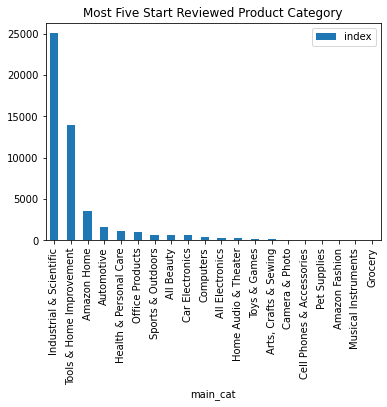

In [ ]:
data_df.loc[data_df['main_cat']=='<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>','main_cat']='Amazon Fashion'
g1= data_df[['index','main_cat']][data_df['overall']==5].groupby('main_cat').count().sort_values(by = 'index',ascending=False)
g1.reset_index(inplace=True)
g1.plot.bar(x = 'main_cat', y='index', rot=90, title="Most Five Start Reviewed Product Category");

Unique Values in categorical columns 

In [ ]:
for i in data_df.columns:
    if data_df[i].nunique()<200:
        print(i,':',data_df[i].unique())

overall : [5 4 3 1 2]
verified : [ True False]
main_cat : ['Tools & Home Improvement' 'Industrial & Scientific' 'Amazon Home'
 'All Beauty' 'Office Products' 'Health & Personal Care' 'Automotive'
 'Sports & Outdoors' 'Pet Supplies' 'Toys & Games' 'Home Audio & Theater'
 'Amazon Fashion' 'Car Electronics' 'Arts, Crafts & Sewing'
 'Camera & Photo' 'Computers' 'Musical Instruments' 'All Electronics'
 'Grocery' 'Cell Phones & Accessories']


In [ ]:
data_df['verified']=data_df['verified'].map({True:1,False:0})

## $$\;\;\;\; Interactive \ Univariate \ Analysis \ of \ Categorical \ Variables$$

In [ ]:
from ipywidgets import interact
data_df2=data_df[cat]
def cat_info(col): # to define the description of selected  columns
    print(f"Unique values in {data_df2.columns[col]} are: {data_df2.iloc[:,col].unique()}")   # to get the unique values of column
    print(f"Mode of {data_df2.columns[col]} is {data_df2.iloc[:,col].mode()[0]}")  # to print mode values 
    print(f"Number of missing values in {data_df2.columns[col]} is {data_df2.iloc[:,col].isnull().sum()}")  # to print the missig values in columns  
    if data_df2.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {data_df2.columns[col]} column")  #


def count_bar(ax,count='number of rows'):
    for bar in ax.patches:                                            
        percentage = f"{round(bar.get_height() , 2)}"  
                                                                           
        x = bar.get_x() + bar.get_width() /2                          
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center")  


#data_df2=data_df[cat]
def cat_vis(col,palette='magma'):
    cat_info(col)
    explode=[0.1]*len(data_df2.iloc[:,col].unique())

    figs,axes=plt.subplots(1,2,figsize=(25,10))
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette,ax=axes[0]).set_xticklabels(data_df2.iloc[:,col].unique(),rotation=90)
    count_bar(axes[0],data_df2.iloc[:,col])
    plt.title(data_df2.columns[col])
    plt.pie(data_df2.iloc[:,col].value_counts(),explode=explode,autopct='%0.2f%%',shadow=True,startangle=90)
    plt.legend(data_df2.iloc[:,col].unique(), loc='lower right')
    plt.xticks(rotation=90)

    plt.show()

interact(cat_vis,col=(0,len(data_df2.columns)-1,1),palette=['magma','viridis'],columns=[cat]) ;

interactive(children=(IntSlider(value=1, description='col', max=2), Dropdown(description='palette', options=('…

## $$\;\;\;\;  Univariate \ Analysis \ of \ Categorical \ Variables$$

In [ ]:
def detail (data_df,i,a):
    data_df[i]=data_df[i].apply(lambda x: ' ,'.join(str(x) for x in x) if type(x)==list else  x)                   # Converts the data from list to str
    print('The Number of unique values in column - {0} is {1}\n'.format(str(i),(data_df[i].nunique())))            # gets count of unique value from the column
    print('The Null values in this column {0} is {1} '.format(str(i),len_null(data_df,i)))                         # gets count of Null value from the column
    print('\nThe number of duplicates are :',(data_df.duplicated(subset=[i for i in data_df.columns],keep='first').sum()))    # gets count of Duplicates value from the column
    print('\nThe Most frequent Value are :\n')
    x = mostcommon(data_df,i,5)
    if a=='plot':
      x.plot(kind='bar', x = 'Name',y='Count')                                                            # display most frequent occurence of data 
    else:
      display(x)  

## **Analysis of Ratings**

The Number of unique values in column - overall is 5

The Null values in this column overall is 0 

The number of duplicates are : 0

The Most frequent Value are :

The Unique Value are - [5 4 3 1 2]


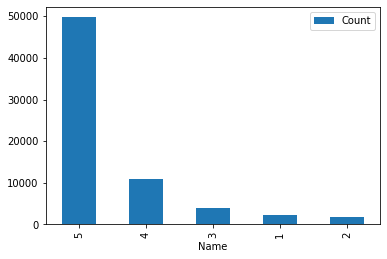

In [ ]:
detail(data_df,'overall','plot')
print('The Unique Value are -',data_df['overall'].unique())

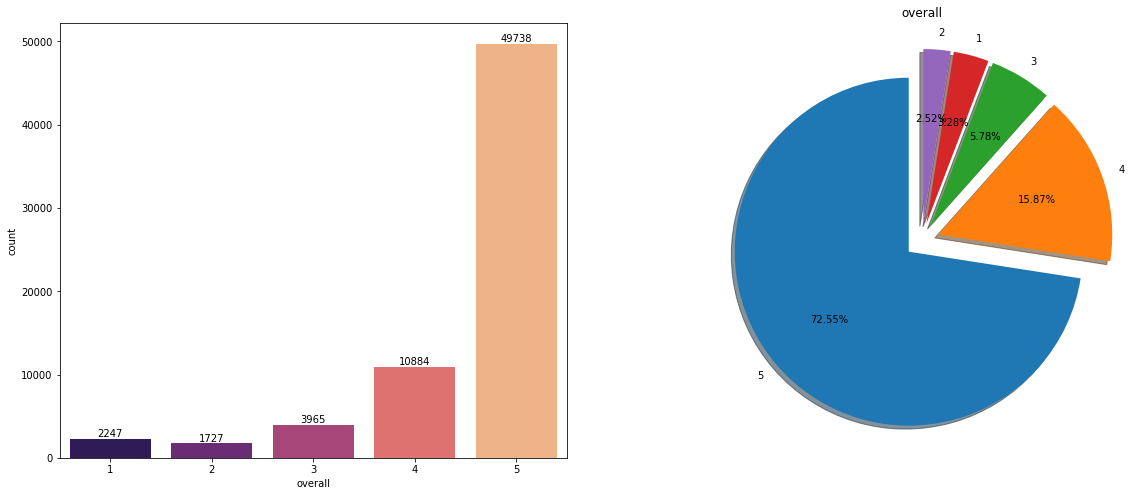

In [ ]:
    explode=[0.1]*len(data_df['overall'].unique())

    figs,axes=plt.subplots(1,2,figsize=(20,8))
    sns.countplot(data=data_df,x=data_df['overall'],palette='magma',ax=axes[0])
    count_bar(axes[0],data_df['overall'])
    plt.title('overall')
    plt.xticks(rotation=0)
    plt.pie(data_df['overall'].value_counts(),labels=data_df['overall'].unique(),explode=explode,autopct='%0.2f%%',shadow=True,startangle=90)
    plt.show()

We can clearly see that people don't bother leaving a rating for a mediocre product, people who are extremely satisfied with their product(score of 5), have taken the time to leave a rating.Also it is seen that people have left more ratings for 1 star products than 2 star products,that shows people who are extremely dissatisfied with their purchase take more initiative than people who are just slightly unhappy with their purchase.

# **Analysis of Verified customers**

The Number of unique values in column - verified is 2

The Null values in this column verified is 0 

The number of duplicates are : 0

The Most frequent Value are :

[1 0]


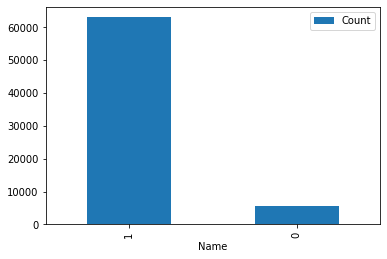

In [ ]:
detail(data_df,'verified','plot')
print(data_df['verified'].unique())

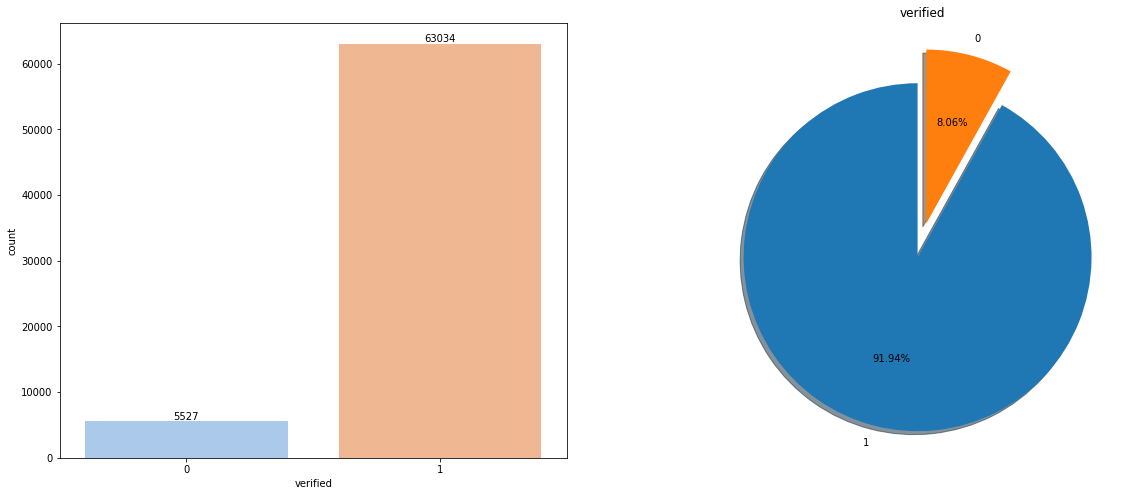

In [ ]:
    explode=[0.1]*len(data_df['verified'].unique())

    figs,axes=plt.subplots(1,2,figsize=(20,8))
    sns.countplot(data=data_df,x=data_df['verified'],palette='pastel',ax=axes[0])
    count_bar(axes[0],data_df['verified'])
    plt.title('verified')
    plt.xticks(rotation=0)
    plt.pie(data_df['verified'].value_counts(),labels=data_df['verified'].unique(),explode=explode,autopct='%0.2f%%',shadow=True,startangle=90)
    plt.show()

We can see that a large proportion of people who leave reviews are verified.

# **Analysis of Main_Cat**

The Number of unique values in column - main_cat is 20

The Null values in this column main_cat is 0 

The number of duplicates are : 0

The Most frequent Value are :



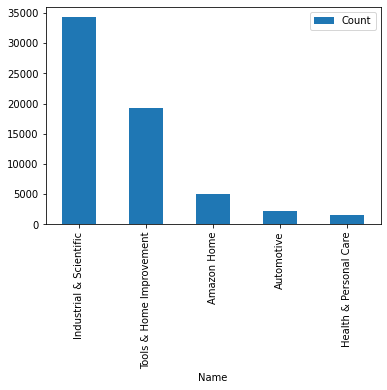

In [ ]:
detail(data_df,'main_cat','plot')

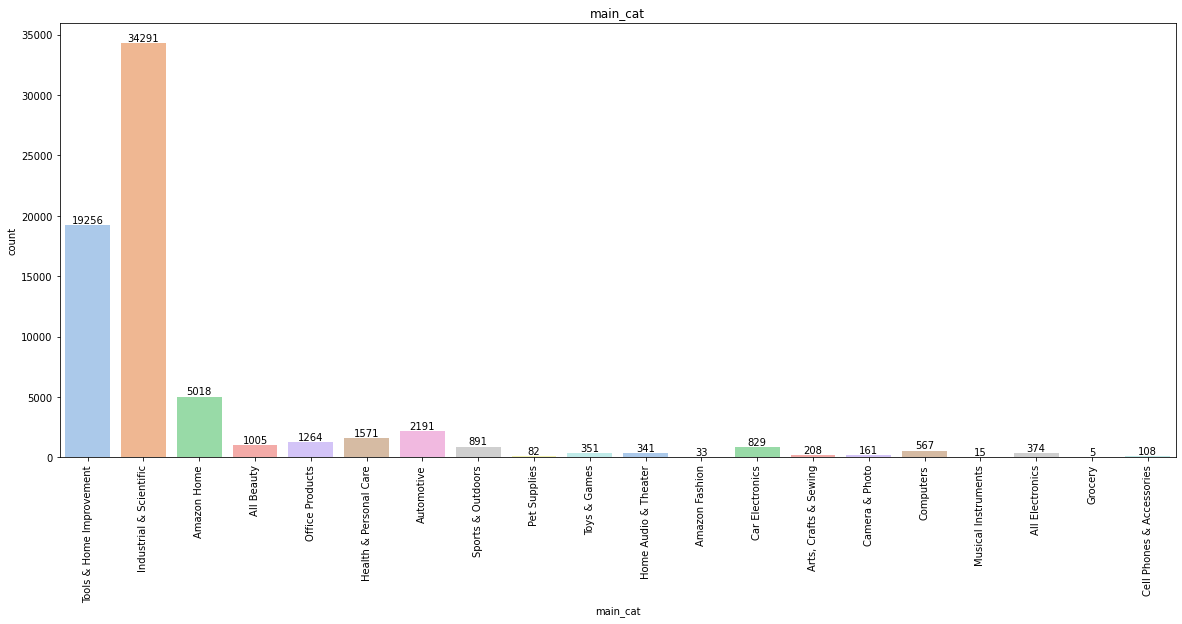

In [ ]:
explode=[0.1]*len(data_df['main_cat'].unique())
figs,axes=plt.subplots(figsize=(20,8))
sns.countplot(data=data_df,x=data_df['main_cat'],palette='pastel',ax=axes)
count_bar(axes,data_df['main_cat'])
plt.title('main_cat')
plt.xticks(rotation=90)
#plt.pie(data_df['main_cat'].value_counts(),labels=data_df['main_cat'].unique(),explode=explode,autopct='%0.2f%%',shadow=True,startangle=90)
plt.show()

## **Analysis of Categories**



In [ ]:
detail(data_df,'category','df') 

The Number of unique values in column - category is 804

The Null values in this column category is 1799 

The number of duplicates are : 0

The Most frequent Value are :



,Name,Count
0,"Industrial & Scientific ,Additive Manufacturin...",5308
1,,1799
2,"Industrial & Scientific ,Tapes, Adhesives & Se...",1612
3,"Industrial & Scientific ,Test, Measure & Inspe...",1606
4,"Industrial & Scientific ,Tapes, Adhesives & Se...",1340


**From the above visulaization we can see that category column is a combination of multiple category**



## $$\;\;\;\; Interactive \ Univariate \ Analysis \ of \ Continuous \ Variables$$

In [ ]:
data_df['pricee']=np.log(data_df['price'])

In [ ]:
data_df1=data_df[['price','rank','pricee']]

def num_info(col):
    print(f"The mean of the {data_df1.columns[col]} is {data_df1[data_df1.columns[col]].mean()}")
    print(f"The median of the {data_df1.columns[col]} is {data_df1[data_df1.columns[col]].median()}")
    print(f"The standard deviation of the {data_df1.columns[col]} is {data_df1[data_df1.columns[col]].std()}")
    print(f"Number of missing values in the {data_df1.columns[col]} is {data_df1[data_df1.columns[col]].isnull().sum()}")

#data_df1=data_df[con]
def con_vis(col,palette='magma'):
    num_info(col)
    figs,axes = plt.subplots(1,2,figsize=(12,7))
    sns.boxplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[0])
    sns.histplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[1],kde=True)
    plt.title(data_df1.columns[col])
    plt.show()

interact(con_vis,col=(0,len(data_df1.columns)-1,1),palette=['magma','viridis'],columns=[cat]);    

interactive(children=(IntSlider(value=1, description='col', max=2), Dropdown(description='palette', options=('…

## $$\;\;\;\;  Univariate \ Analysis \ of \ Text\ Data $$

## **Top Reviewers**

The Number of unique values in column - reviewerID is 11014

The Null values in this column reviewerID is 0 

The number of duplicates are : 0

The Most frequent Value are :



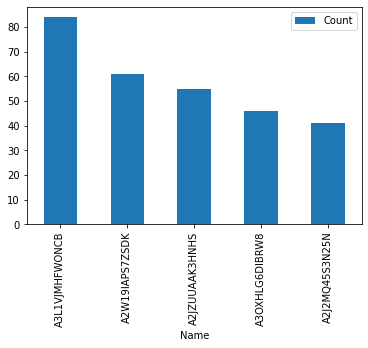

In [ ]:
detail(data_df,'reviewerID','plot')

## **Reviewer Name**

In [ ]:
l=[]
a=mostcommon(data_df,'reviewerID',10)
for i in a['Name']:
  l.append(str(data_df.loc[data_df['reviewerID']==i,'reviewerName'].unique()))
l


["['CDP&#039;s Onceagain habit of purchasing']",
 "['Ian Mazursky']",
 "['Old Sarge']",
 "['C. Hill']",
 "['Amazon Customer']",
 "['Trex']",
 "['ventingisok']",
 "['sugarbear' 'pattiboypatrick16']",
 "['SJK']",
 "['Frog']"]

## **Review Text**

The Number of unique values in column - reviewText is 55237

The Null values in this column reviewText is 0 

The number of duplicates are : 0

The Most frequent Value are :


The First Row:
 This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.

Pros:
-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper
-Didn't even have a hint of clogging up.
-The adhesive is just what I needed. No permanent, but wasn't going anywhere.

Cons:
-None


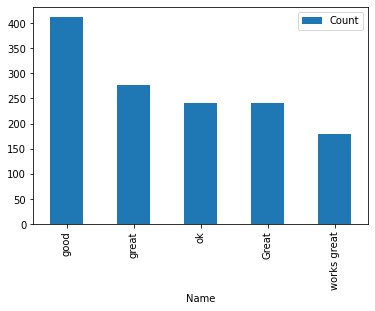

In [ ]:
detail(data_df,'reviewText','plot')
print('\nThe First Row:\n',data_df['reviewText'][0])

## **Analyazing Summary**

The Number of unique values in column - summary is 37486

The Null values in this column summary is 0 

The number of duplicates are : 0

The Most frequent Value are :


The First Row :
 Couldn't have been happier with it's performance


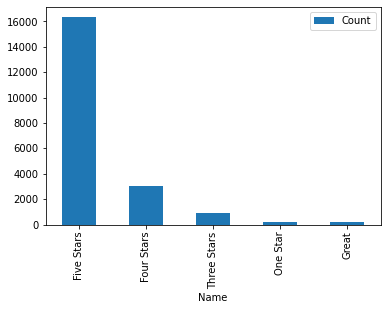

In [ ]:
detail(data_df,'summary','plot')
print('\nThe First Row :\n',data_df['summary'][0])

## **ProductID**

The Number of unique values in column - asin is 5105

The Null values in this column asin is 0 

The number of duplicates are : 0

The Most frequent Value are :



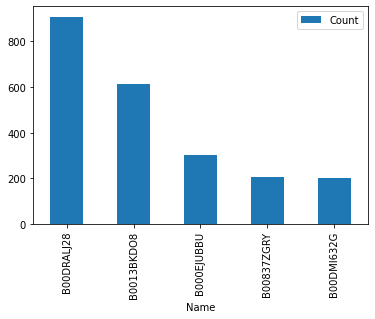

In [ ]:
detail(data_df,'asin','plot')

## **Brand**

The Number of unique values in column - brand is 1842

The Null values in this column brand is 0 

The number of duplicates are : 0

The Most frequent Value are :



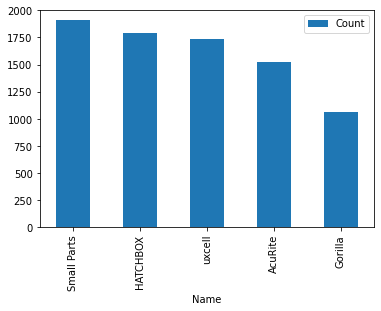

In [ ]:
detail(data_df,'brand','plot')

## **Most reviewed products brands**

In [ ]:
b=mostcommon(data_df,'asin',10)
l=[]
for i in b['Name']:
  l.append(str(data_df.loc[data_df['asin']==i,'brand'].unique()))
l

["['AcuRite']",
 "['AcuRite']",
 "['Neiko']",
 "['Etekcity']",
 "['Etekcity']",
 "['Pipettes']",
 "['J-B Weld']",
 "['Camco']",
 "['Gorilla']",
 "['iGaging']"]

# **Description**

In [ ]:
detail(data_df,'summary','df')

The Number of unique values in column - summary is 37486

The Null values in this column summary is 0 

The number of duplicates are : 0

The Most frequent Value are :



,Name,Count
0,Five Stars,16318
1,Four Stars,3033
2,Three Stars,900
3,One Star,233
4,Great,203


## $$\;\;\;\;  Bivariate \ Analysis \ of \ Data $$

In [ ]:
from ipywidgets import interact
x = list(data_df.main_cat.unique())
x.append('Select All')
def cat_vis(main_category,palette='magma'):
  if main_category == 'Select All':
    g_data = data_df
  else:
    g_data = data_df[data_df['main_cat']==main_category]
  numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
  con_df=g_data.select_dtypes(include=numerics)# create dataframe for all numeric type
  con_df.drop('overall',axis=1,inplace=True);
  con_cols=con_df.columns # taking colums 
  con_cols
  figs,axes =plt.subplots(1,2,tight_layout=True,figsize=(15,7))
  for col ,ax in zip(con_cols,axes.flatten()):
      sns.boxplot(data = g_data,y=g_data[col], x=g_data['overall'],ax=ax,palette=palette)
      ax.set_title(col)
  plt.show()

interact(cat_vis,main_category=x,palette=['magma','viridis','pastel','dark']) ;

interactive(children=(Dropdown(description='main_category', options=('Tools & Home Improvement', 'Industrial &…

In [ ]:
from ipywidgets import interact
x = list(data_df.main_cat.unique())
x.append('Select All')
def cat_vis(main_category,palette='magma'):
  if main_category == 'Select All':
    g_data = data_df
  else:
    g_data = data_df[data_df['main_cat']==main_category]
  numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
  con_df=g_data.select_dtypes(include=numerics)# create dataframe for all numeric type
  con_df.drop(['verified','index'],axis=1,inplace=True);
  con_cols=con_df.columns # taking colums 
  con_cols
  figs,axes =plt.subplots(1,2,tight_layout=True,figsize=(15,7))
  for col ,ax in zip(con_cols,axes.flatten()):
      sns.boxplot(data = g_data,y=g_data[col], x=g_data['verified'],ax=ax,palette=palette)
      ax.set_title(col)
  plt.show()

interact(cat_vis,main_category=x,palette=['magma','viridis','pastel','dark']) ;

interactive(children=(Dropdown(description='main_category', options=('Tools & Home Improvement', 'Industrial &…

It can be observed that most verified customers chose to purchase products thatare higher up in the ranked list of products.

## $$\;\;\;\;  Multivariate \ Analysis \ of \ Data $$

In [ ]:
data_df['pricee']=np.log(data_df['price'])
from ipywidgets import interact
x = list(data_df.main_cat.unique())
x.append('Select All')
def cat_vis(main_category,palette='magma', Price='Log Price'):
  if main_category == 'Select All':
    g_data = data_df
  else:
    g_data = data_df[data_df['main_cat']==main_category]
  plt.figure(figsize=(15,8))
  if Price  =='Log Price':
    Price  = 'pricee'
  sns.boxplot(data = g_data,x='overall',y=Price ,hue='verified', palette=palette)
  plt.show()

interact(cat_vis,main_category=x,palette=['magma','viridis','pastel','dark'], Price = ['price','Log Price']) ;

interactive(children=(Dropdown(description='main_category', options=('Tools & Home Improvement', 'Industrial &…

# **Insights**

### We can see that a large proportion of people who leave reviews are verified.
---

### After visualizing all the feauters we came to know that people don't give  rating for a mediocre product, people who are extremely satisfied with their product(score of 5), have taken the time to leave a rating.Also it is seen that people have left more ratings for 1 star products than 2 star products,that shows people who are extremely dissatisfied with their purchase take more initiative than people who are just slightly unhappy with their purchase.
---

### It can be observed that most verified customers chose to purchase products thatare higher up in the ranked list of products.


---


### **Recommendation**: After visualizing all the feauters the most recommeded brands are **Small Parts, Hatchbox, Uxcell Acurite, Gorilla in Industrial and Scientific Category**



# **Natural Language Processing**

In [ ]:
import spacy 
from spacy.lang.en import English
! python -m spacy download en_core_web_lg
nlp=spacy.load('en_core_web_lg')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-13 08:06:35.751187: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import re
from spacy.lang.en.stop_words import STOP_WORDS
def Textclean(text):
  doc=nlp(text)
  vector=[]
  for i in doc:
    if (i.is_stop==False) and (i.is_punct==False) and (i.is_digit==False):
      vector.append(i.lemma_)
  a=' '.join(vector)   
  a=re.sub(r'\W+',' ',a)
  a=re.sub('\s',' ',a)
  a=a.lower().strip()
  return a 

In [ ]:
text='hello yogesh yadav wassup'
Textclean(text)

'hello yogesh yadav wassup'

In [ ]:
def vector(text):
  doc=nlp(text)
  return doc.vector

In [ ]:
text='hello yogesh yadav wassup'
a=vector(text)
a.shape

(300,)

In [ ]:
# Function 
# Text+summary
# Clean data
# Vector
# Imbalance Data 
# SMOTE  
# TFIDF(Logistic)
# Fasttext

In [ ]:
data_df['review']=data_df['reviewText']+' '+data_df['summary']

In [ ]:
data_df['review']=data_df['review'].apply(Textclean)
data_df['review'][0]

'work purpose get mark great durable afforable sandpaper pro grit cut fast evenly random deep scratch like see cheap paper didn t hint clog the adhesive need permanent go con none happy performance'

In [ ]:
data_df['vector']=data_df['review'].apply(vector)

In [ ]:
data_df['vector'][0].shape

(300,)

In [ ]:

data_df['Sentiments']=data_df['overall'].map({
    1:'Negative',
    2:'Negative',
    3:'Neutral',
    4:'Positive',
    5:'Positive'
})

In [ ]:
data_df['Sentiments'].value_counts()

Positive    60622
Negative     3974
Neutral      3965
Name: Sentiments, dtype: int64

In [ ]:
#data_df.to_csv('Clean_data.csv',header=True,index=True)

In [ ]:
def sentanalysis(Sentiment='Positive',cat='Industrial & Scientific'):
  data_df4=data_df[(data_df['main_cat']==cat) & (data_df['Sentiments']==Sentiment)]
  a=mostcommon(data_df4,'brand',10)
  #display(a)
  a.plot(kind='bar',x = 'Name',rot=90)

interact(sentanalysis,Sentiment=['Positive','Negative','Neutral'],cat=[x for x in data_df['main_cat'].unique()]) ; 

interactive(children=(Dropdown(description='Sentiment', options=('Positive', 'Negative', 'Neutral'), value='Po…

In [2]:
import re                                  # for text preprocessing
import pandas as pd                        # for data manipulation and analysis
import json                                # to load  jason file
import  numpy as np                        # to deal with mul
import matplotlib.pyplot as plt            # for visualization
import seaborn as sns                      # for visualization
from tabulate import tabulate              # to create tabels 
from ipywidgets import interact            # to make intractive functions 
pd.set_option('display.max_columns',30)    # to limit the number of rows displayed
from datetime import datetime              # for preprocessing the data for time-series analysis
import warnings 
warnings.filterwarnings('ignore')
#import mysql.connector as sql
from google.colab import drive # to access the drive files 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
data_df=pd.read_csv('Clean_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Label Encoding 

In [ ]:
label=LabelEncoder()

data_df['N_sents']=label.fit_transform(data_df['Sentiments'])

# SMOTE 

### Because the classes are not equally spread thats why our model is not highly trained on other classes so we will use the SMOTE technique to increase the samples of the class which have less data.

In [ ]:
smote=SMOTE(sampling_strategy='auto')

In [ ]:
x=data_df['review']
y=data_df['N_sents']

In [ ]:
tfidf=TfidfVectorizer(max_features=20000)
a=tfidf.fit_transform(x)
a.toarray()
X, Y=smote.fit_resample(a,y)
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.3,random_state=12)

# TFIDF

### MultinomialNB

The Accuracy of the model : 79.41348973607039 %
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     19198
           1       0.77      0.75      0.76     18577
           2       0.75      0.82      0.78     16785

    accuracy                           0.79     54560
   macro avg       0.79      0.79      0.79     54560
weighted avg       0.80      0.79      0.79     54560



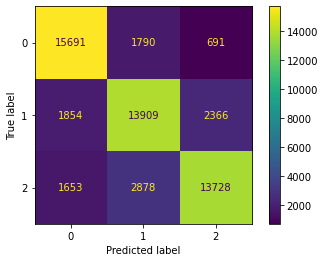

In [ ]:
model1=MultinomialNB()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print('The Accuracy of the model :',accuracy_score(y_test,y_pred)*100,'%')

print(classification_report(y_pred,y_test))
plot_confusion_matrix(model1,x_test,y_test);

Predicting on unknown data 

In [ ]:
text=["After a few days, there is a yellow color over the mouse rubber. I think rubber reacted with sweat. It doesn't look good now. And no way to clean it. So please go for dark color."]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[model1.predict(test)]

array(['Neutral'], dtype=object)

### Logistic Regression

The Accuracy of the model : 84.28702346041057 %
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     19283
           1       0.82      0.80      0.81     18533
           2       0.79      0.86      0.82     16744

    accuracy                           0.84     54560
   macro avg       0.84      0.84      0.84     54560
weighted avg       0.85      0.84      0.84     54560



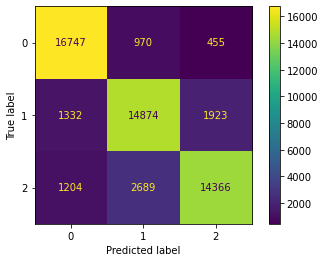

In [ ]:
modell=OneVsRestClassifier(LogisticRegression( ))
modell.fit(x_train,y_train)
y_pred=modell.predict(x_test)
print('The Accuracy of the model :',accuracy_score(y_test,y_pred)*100,'%')

print(classification_report(y_pred,y_test))
plot_confusion_matrix(modell,x_test,y_test);

Predicting on unknown data 

In [ ]:
text=["After a few days, there is a yellow color over the mouse rubber. I think rubber reacted with sweat. It doesn't look good now. And no way to clean it. So please go for dark color."]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[modell.predict(test)]

array(['Neutral'], dtype=object)

# Fasttext 

In [ ]:
! pip install fasttext
import fasttext

In [ ]:
from sklearn.model_selection import train_test_split
data_fast=data_df[['Sentiments','review']]
data_fast['sentiment'] = '__label__' + data_fast['Sentiments'].astype(str)
data_fast['sentiment_review'] = data_fast['sentiment'] + ' ' + data_fast['review']

train_df, test_df = train_test_split(data_fast, test_size=0.2)

train_df.to_csv("Train", columns=["sentiment_review"], index=False, header=False)
test_df.to_csv("Test", columns=["sentiment_review"], index=False, header=False)
data_fast.head()

In [ ]:
model = fasttext.train_supervised(input="Train",lr=0.2, epoch=20, wordNgrams=3)
test_num, precision, recall=model.test("Test")
f_score = (2*precision*recall)/(precision+recall)
print('No. of Test Samples:',test_num)
print('Precision Score:',precision)
print('Recall:',recall)
print('F1 score:',f_score)

In [ ]:
model.predict('half')

In [ ]:
model.predict(' i am very disappointed with this product')

In [ ]:
model.predict(' The product worked really well')

In [ ]:
model.get_nearest_neighbors('disappointed')

In [ ]:
model.predict(' product is working ')

In [ ]:
# !pip install gensim
# pip install python-Levenshtein
# import gensim
# data_df = pd.read_csv('Capstone Final Data.csv')

In [ ]:
# data_df['reviewText'][0]
# data_df['summary'][0]
# data_df['Reviews'] =data_df['reviewText']+data_df['summary']
# data_df['Reviews'][0]
# review_text = data_df['Reviews'].apply(gensim.utils.simple_preprocess)
# model = gensim.models.Word2Vec(
#     window=10,
#     min_count = 2
# )
# model.build_vocab(review_text,progress_per = 100)
# model.epochs
# review_text
# model.train(review_text, total_examples = model.corpus_count,epochs=model.epochs)
# review_text[1]
# model.wv[review_text[1]]
# try:
#   data_df['review_text1'] = data_df['review_text1'].apply(lambda x: model.wv[i] for i in x)
# except KeyError:
#   pass
# data_df['review_text1'] = review_text  

# **Classification Models**

### **Product based classification**

In [5]:
data1=pd.get_dummies(data_df['verified'])
data_df=pd.concat([data_df,data1],axis=1)

In [6]:
data=pd.get_dummies(data_df['Sentiments'])
data_df=pd.concat([data_df,data],axis=1)

In [7]:
data_df['Negative']=data_df['Negative'].replace(0,np.nan,regex=True)
data_df['Neutral']=data_df['Neutral'].replace(0,np.nan,regex=True)
data_df['Positive']=data_df['Positive'].replace(0,np.nan,regex=True)
data_df[0]=data_df[0].replace(0,np.nan,regex=True)
data_df[1]=data_df[1].replace(0,np.nan,regex=True)

In [62]:
import statistics as st
mode = lambda x: st.mode(x)
cl=data_df.groupby(['asin']).agg(
Total_Sold=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count'),
Rating=('overall',mode)
).reset_index()
display(cl.head())

,asin,Total_Sold,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
0,B0000223SI,12,0,0,13,15.99,207.87,19857.0,12,1,5
1,B0000223SK,20,0,1,21,17.99,395.78,13586.0,20,2,5
2,B0000223UV,26,1,2,32,10.24,358.40,340.0,26,9,5
3,B00002246J,15,0,1,15,4.34,69.44,330278.0,15,1,5
4,B0000224J0,12,0,0,15,6.98,104.70,51285.0,12,3,5


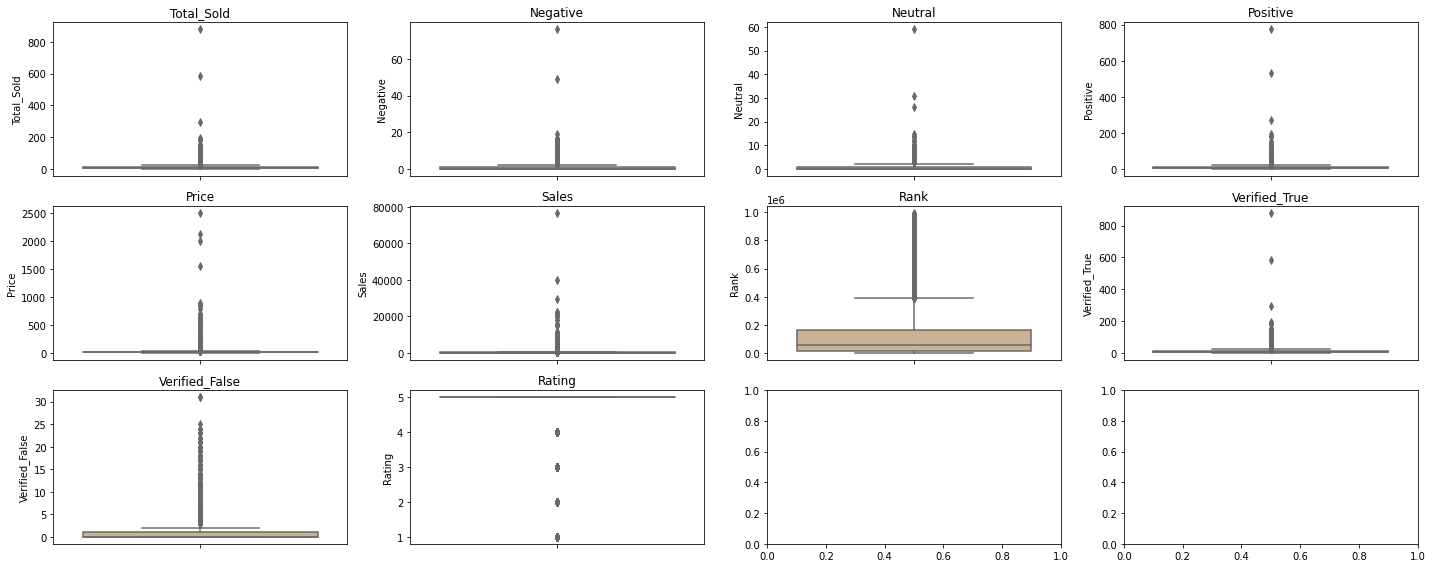

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(y=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

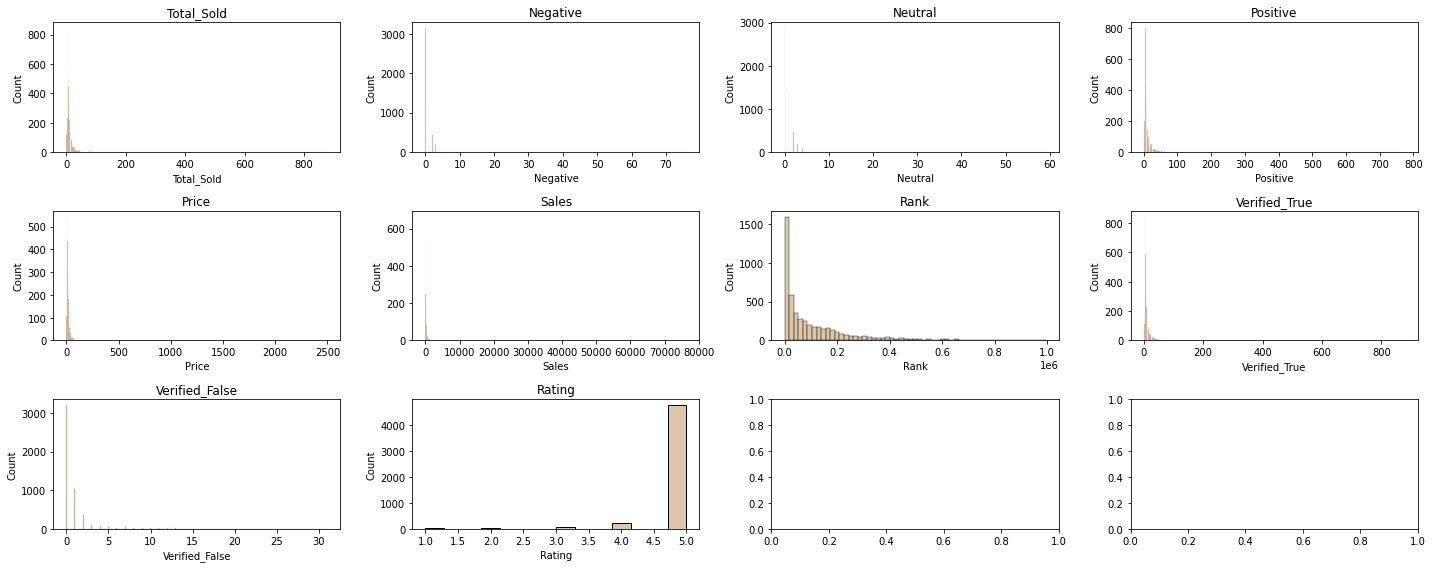

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.histplot(x=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

In [ ]:
cl.Rating.value_counts()

5    4760
4     240
3      60
1      28
2      17
Name: Rating, dtype: int64

In [ ]:
smote=SMOTE(sampling_strategy='auto')
X = cl.iloc[:,1:9]
y = cl.Rating
X_s, Y_s=smote.fit_resample(X,y)
x = pd.concat([X_s, Y_s],axis=1)
x.Rating.value_counts()

5    4760
4    4760
3    4760
1    4760
2    4760
Name: Rating, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier #model
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score,f1_score,precision_score #to get the score of classifier

In [ ]:
X_train,X_test,y_train, y_test= train_test_split(X_s, Y_s,train_size=0.7)
dt = DecisionTreeClassifier(random_state=1) # crating classifier 

In [ ]:
dt.fit(X_test,y_test) # fitting the train data

DecisionTreeClassifier(random_state=1)

In [ ]:
DT_pred= dt.predict(X_test) # predicting test data
DT_pred1= dt.predict(X_train) # predicting train data

In [ ]:
a_s = accuracy_score(y_train,DT_pred1) # gives the accuracy of model how well our classifier
r_s = recall_score(y_train,DT_pred1, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_train,DT_pred1, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_train,DT_pred1, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.9
Recall_score is: 0.89970795271834
Precision_score is: 0.8991526122375747
F1_score is: 0.8992389655839474


In [ ]:
a_s = accuracy_score(y_test,DT_pred) # gives the accuracy of model how well our classifier
r_s = recall_score(y_test,DT_pred, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_test,DT_pred, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_test,DT_pred, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 1.0
Recall_score is: 1.0
Precision_score is: 1.0
F1_score is: 1.0


# **Clustring**

In [8]:
mode = lambda x: st.mode(x)
c2=data_df.groupby(['reviewerID']).agg(
Total_Purchase=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count'),
Rating=('overall','mean')
).reset_index()
display(c2.sort_values(by='Total_Purchase', ascending=True).head())

,reviewerID,Total_Purchase,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
7113,A3F9CMU8KNAY1M,0,0,1,6,27.208571,190.46,52196.0,0,7,4.428571
9876,ALQ4USPEQ9L5N,0,0,0,6,9.895000,59.37,263289.5,0,6,4.166667
9873,ALNFHVS3SC4FV,0,0,1,6,51.624286,361.37,183160.0,0,7,4.428571
5595,A2WRAS11XMPS96,0,0,0,5,6.764000,33.82,19506.0,0,5,5.000000
8173,A3SFSFJZFI0OQN,0,0,1,0,10.980000,10.98,1121.0,0,1,3.000000


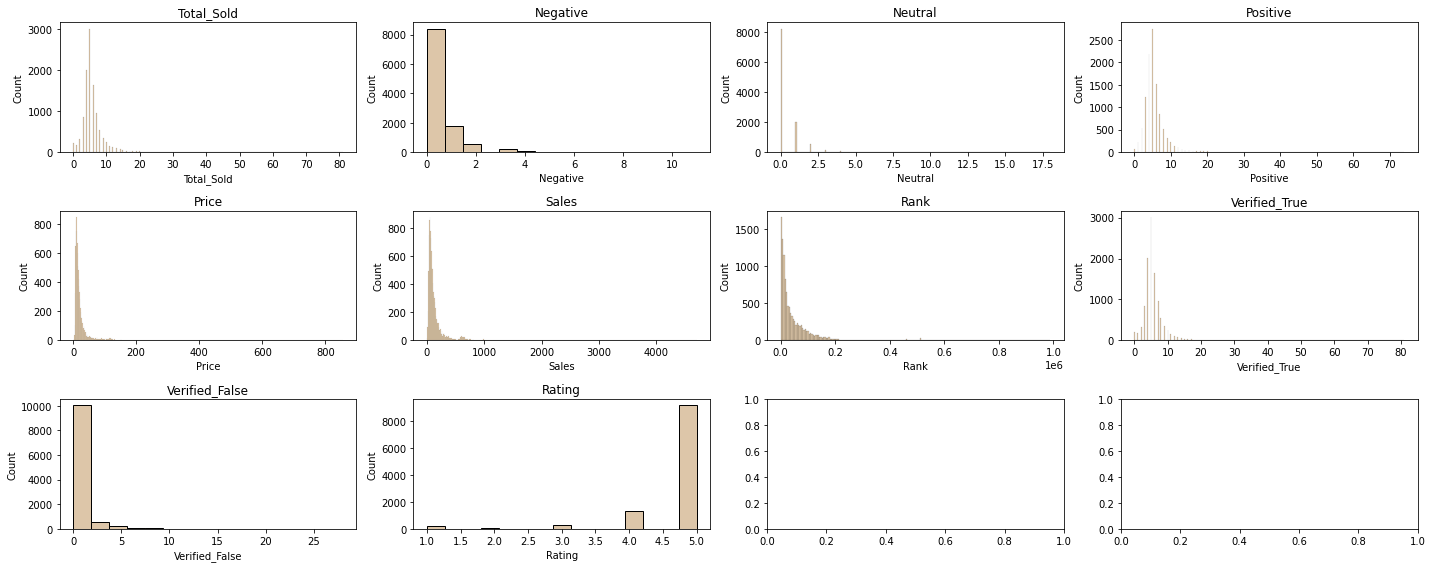

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=c2.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.histplot(x=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

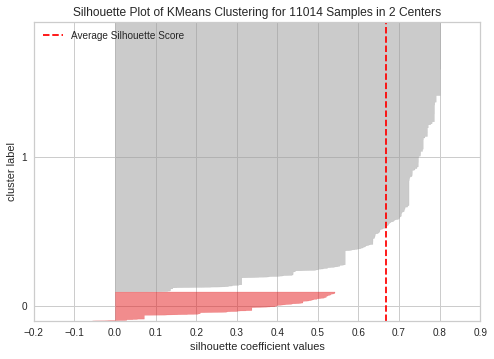

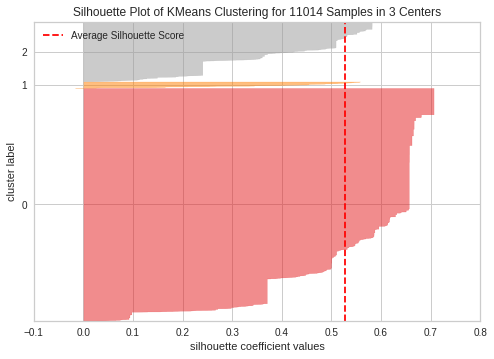

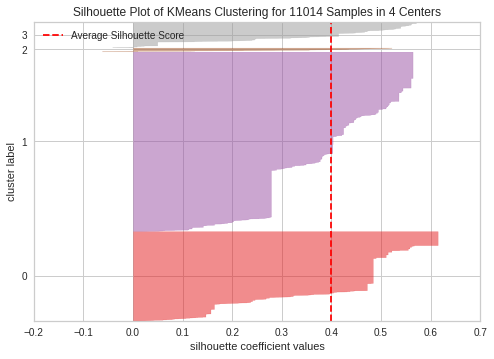

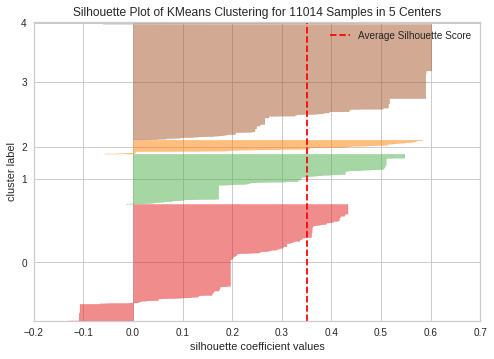

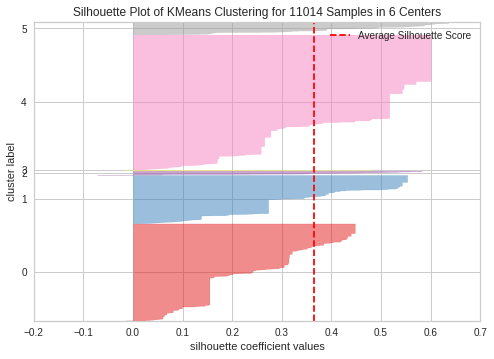

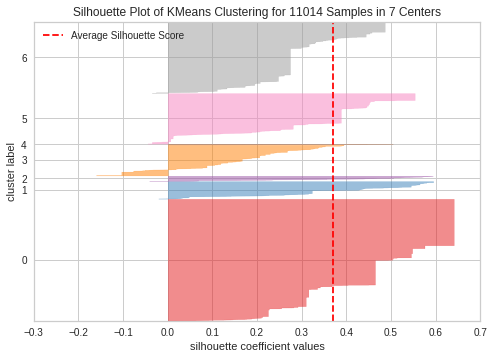

In [48]:
cs = c2.iloc[:,[1,2,3,4]]
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
for i in range(2,8):
    silhouette_visualizer(KMeans(i, random_state=12), cs)

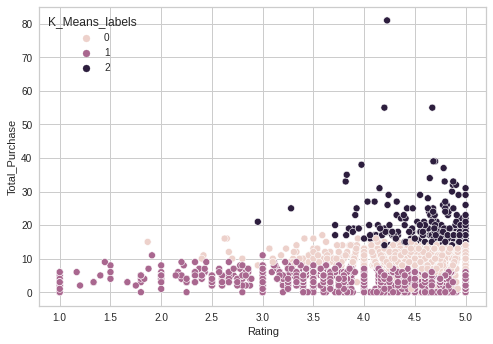

In [49]:
model = KMeans(n_clusters=3)
model.fit(cs)

labels= model.labels_
c2['K_Means_labels'] = labels
sns.scatterplot(data= c2 , y='Total_Purchase',x='Rating', hue = 'K_Means_labels');

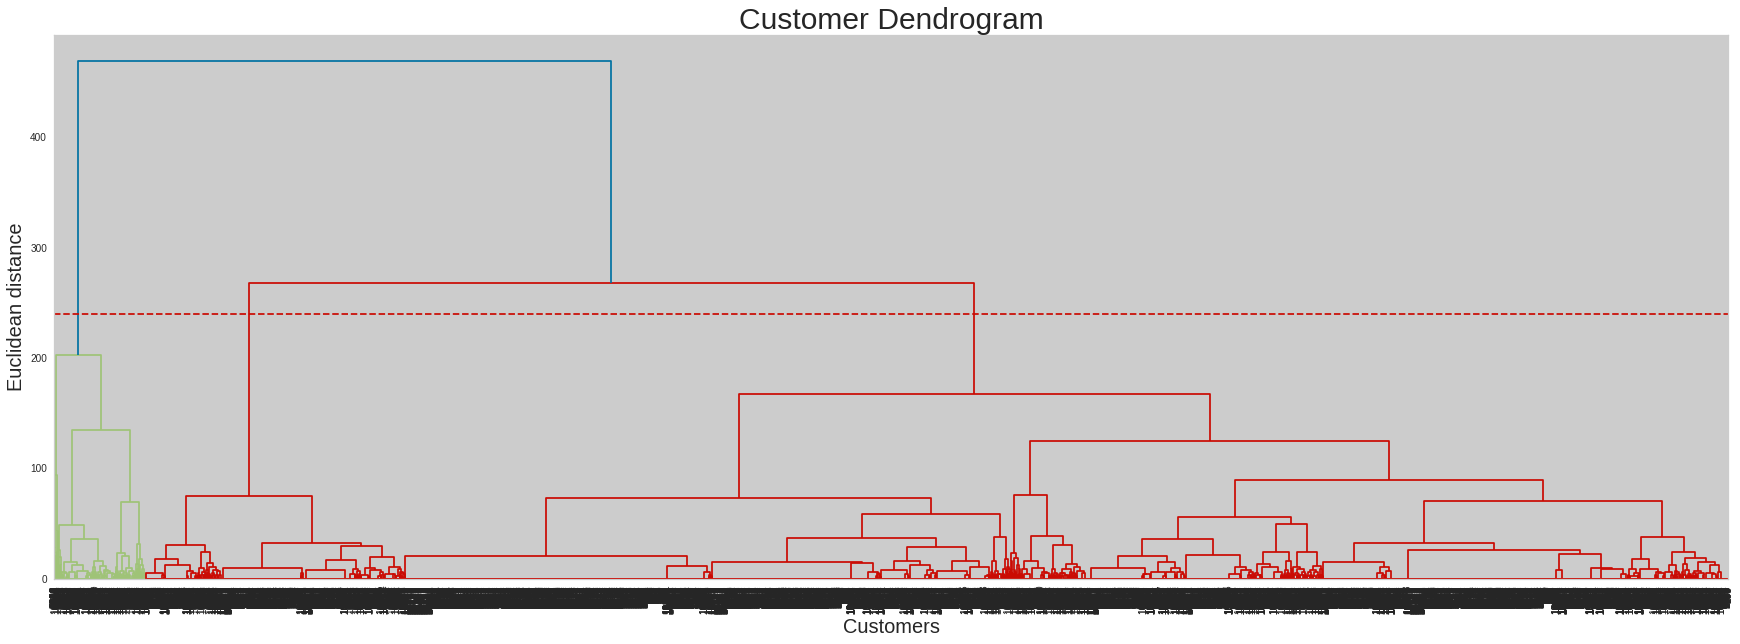

In [55]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sys
sys.setrecursionlimit(100000)

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(cs, method = 'ward'))
plt.axhline(y=240, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [57]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cs)
c2['H_labels'] = y_hc

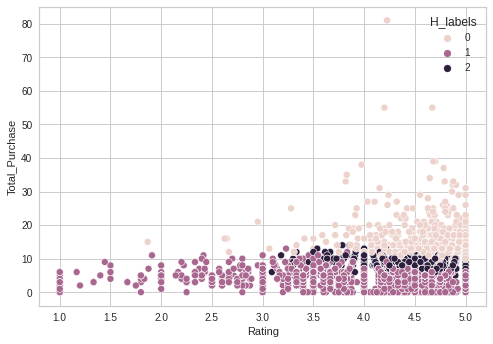

In [58]:
sns.scatterplot(data= c2 , y='Total_Purchase',x='Rating', hue = 'H_labels');

,asin,Total_Sold,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
0,B0000223SI,12,0,0,13,15.99,207.87,19857.0,12,1,5
1,B0000223SK,20,0,1,21,17.99,395.78,13586.0,20,2,5
2,B0000223UV,26,1,2,32,10.24,358.40,340.0,26,9,5
3,B00002246J,15,0,1,15,4.34,69.44,330278.0,15,1,5
4,B0000224J0,12,0,0,15,6.98,104.70,51285.0,12,3,5
...,...,...,...,...,...,...,...,...,...,...,...
5100,B01HCFJC0Y,15,0,0,15,9.21,138.15,12111.0,15,0,5
5101,B01HCQSHNG,7,1,3,3,25.89,181.23,333.0,7,0,3
5102,B01HDXZR5E,17,1,0,16,6.59,112.03,707.0,17,0,5
5103,B01HDYEAOW,5,0,0,5,9.11,45.55,49206.0,5,0,5


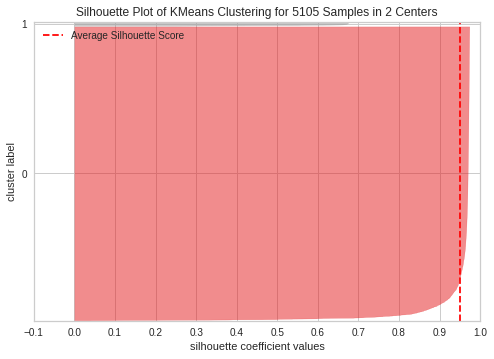

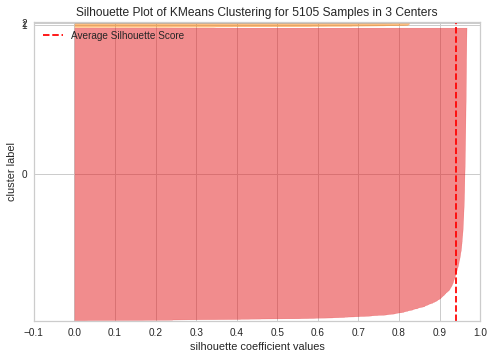

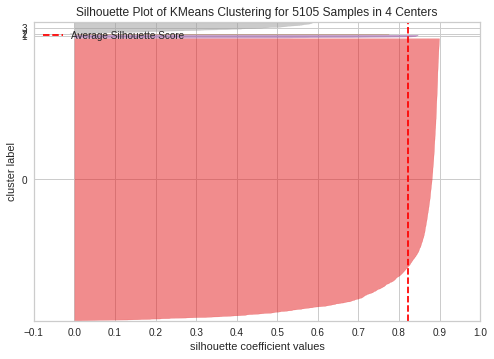

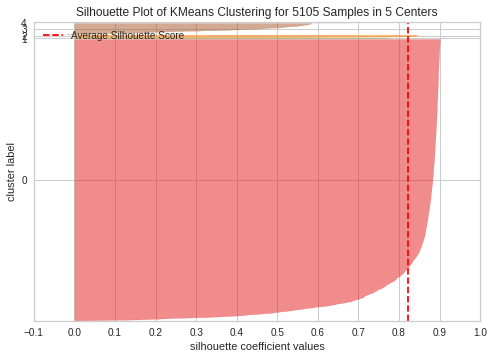

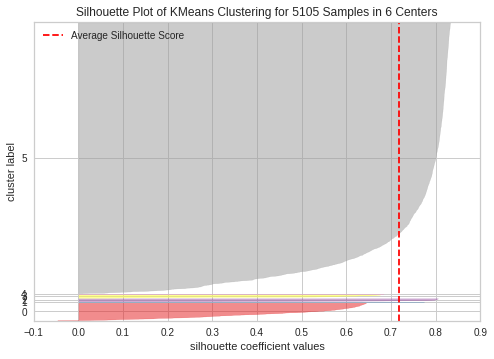

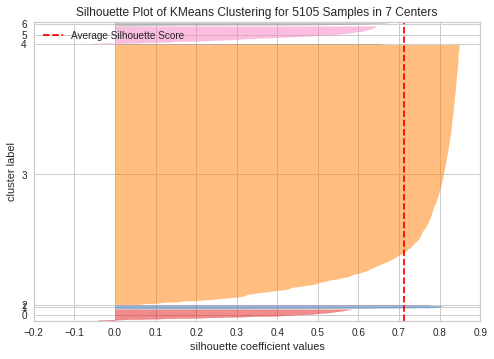

In [66]:
csp = cl.iloc[:,[2,3,4,5]]
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
for i in range(2,8):
    silhouette_visualizer(KMeans(i, random_state=12), csp)

In [74]:
model = KMeans(n_clusters=3)
model.fit(csp)

labels= model.labels_
cl['K_Means_labels'] = labels

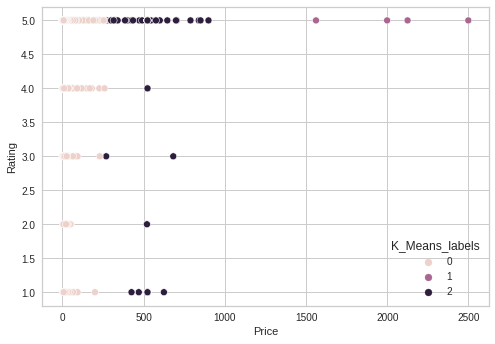

In [75]:
sns.scatterplot(data= cl , x='Price',y='Rating', hue = 'K_Means_labels');